In [1]:
# Imports
from sklearn.datasets import make_multilabel_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import initializers
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Configuration options
n_epochs = 200
batch_size = 32
verbosity = 1
validation_split = 0.2
n_classes = 6

datagen = ImageDataGenerator(rescale=1./255,
                            validation_split = validation_split,
                            shear_range=0.2,
                            zoom_range=0.2,
                            rotation_range=30,
                            width_shift_range=0.2,
                            height_shift_range=0.2,
                            horizontal_flip=True,
                            fill_mode='nearest')

# Generate Train data
traingenerator = datagen.flow_from_directory(
        './input/task3_train_dataset',
        batch_size=batch_size,
        shuffle=True,
        subset='training',
        class_mode='categorical',
        target_size=(150, 150))

# Generate Validation data
valgenerator = datagen.flow_from_directory(
        './input/task3_train_dataset',
        batch_size=batch_size,
        shuffle=True,
        subset='validation',
        class_mode='categorical',
        target_size=(150, 150))

# dividing the dataset into test and train set
x_train, y_train = next(traingenerator)
x_val, y_val = next(valgenerator)

Found 11230 images belonging to 6 classes.
Found 2804 images belonging to 6 classes.


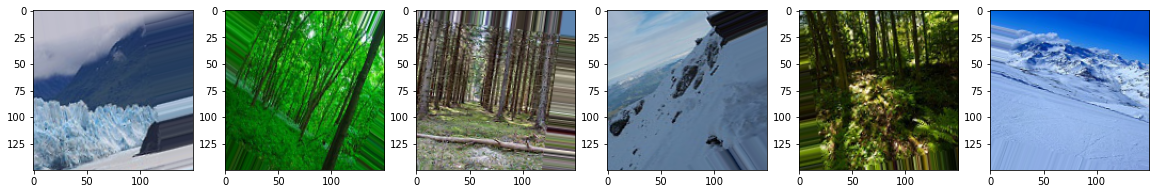

In [3]:
# visualizing the dataset
plt.figure(figsize=(20,10))
for i in range(6):
    plt.subplot(1,6,i+1)
    plt.imshow(x_train[i])

In [4]:
# reshaping the dataset
input_dim = x_train.shape[1] * x_train.shape[2] * x_train.shape[3]
x_train = np.reshape(x_train, (x_train.shape[0], input_dim))
x_val = np.reshape(x_val, (x_val.shape[0], input_dim))

In [5]:
# Create the model
model = Sequential()
initializer = initializers.GlorotNormal()
model.add(Dropout(0.2, input_dim=input_dim))
model.add(Dense(512, activation='relu', kernel_initializer=initializer))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(n_classes, activation='softmax'))

# Compile the model
model.compile(loss=binary_crossentropy,
              optimizer=Adam(),
              metrics=['accuracy'])

# Fit data to model
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=n_epochs,
          verbose=verbosity,
          validation_data=(x_val, y_val))

Epoch 1/200
1/1 [==============================] - 1s 838ms/step - loss: 0.6575 - accuracy: 0.1562 - val_loss: 4.5125 - val_accuracy: 0.1562
Epoch 2/200
1/1 [==============================] - 0s 150ms/step - loss: 5.1864 - accuracy: 0.1562 - val_loss: 1.6073 - val_accuracy: 0.2188
Epoch 3/200
1/1 [==============================] - 0s 150ms/step - loss: 2.8033 - accuracy: 0.2500 - val_loss: 1.3713 - val_accuracy: 0.2500
Epoch 4/200
1/1 [==============================] - 1s 842ms/step - loss: 1.9103 - accuracy: 0.3438 - val_loss: 1.6074 - val_accuracy: 0.1875
Epoch 5/200
1/1 [==============================] - 1s 1s/step - loss: 2.9730 - accuracy: 0.0625 - val_loss: 1.9398 - val_accuracy: 0.1562
Epoch 6/200
1/1 [==============================] - 1s 1s/step - loss: 2.4681 - accuracy: 0.2500 - val_loss: 1.5362 - val_accuracy: 0.1562
Epoch 7/200
1/1 [==============================] - 0s 208ms/step - loss: 1.9541 - accuracy: 0.3125 - val_loss: 1.4836 - val_accuracy: 0.1562
Epoch 8/200
1/1 [==

Epoch 59/200
1/1 [==============================] - 0s 190ms/step - loss: 0.3694 - accuracy: 0.5938 - val_loss: 0.4995 - val_accuracy: 0.3438
Epoch 60/200
1/1 [==============================] - 0s 232ms/step - loss: 0.3002 - accuracy: 0.6250 - val_loss: 0.4994 - val_accuracy: 0.4375
Epoch 61/200
1/1 [==============================] - 0s 202ms/step - loss: 0.2567 - accuracy: 0.7188 - val_loss: 0.5039 - val_accuracy: 0.4688
Epoch 62/200
1/1 [==============================] - 0s 224ms/step - loss: 0.2743 - accuracy: 0.7812 - val_loss: 0.5057 - val_accuracy: 0.4375
Epoch 63/200
1/1 [==============================] - 0s 236ms/step - loss: 0.2432 - accuracy: 0.7500 - val_loss: 0.5050 - val_accuracy: 0.4375
Epoch 64/200
1/1 [==============================] - 0s 212ms/step - loss: 0.3919 - accuracy: 0.6875 - val_loss: 0.5134 - val_accuracy: 0.3750
Epoch 65/200
1/1 [==============================] - 0s 194ms/step - loss: 0.3047 - accuracy: 0.5938 - val_loss: 0.5151 - val_accuracy: 0.4062
Epoch 

1/1 [==============================] - 0s 181ms/step - loss: 0.0597 - accuracy: 0.9688 - val_loss: 0.5625 - val_accuracy: 0.4375
Epoch 117/200
1/1 [==============================] - 0s 183ms/step - loss: 0.0388 - accuracy: 0.9375 - val_loss: 0.5800 - val_accuracy: 0.4688
Epoch 118/200
1/1 [==============================] - 0s 177ms/step - loss: 0.0645 - accuracy: 0.9375 - val_loss: 0.5765 - val_accuracy: 0.4375
Epoch 119/200
1/1 [==============================] - 0s 170ms/step - loss: 0.0654 - accuracy: 0.9375 - val_loss: 0.5770 - val_accuracy: 0.4688
Epoch 120/200
1/1 [==============================] - 0s 177ms/step - loss: 0.0716 - accuracy: 0.9688 - val_loss: 0.5886 - val_accuracy: 0.4688
Epoch 121/200
1/1 [==============================] - 0s 178ms/step - loss: 0.0544 - accuracy: 0.9688 - val_loss: 0.6146 - val_accuracy: 0.4375
Epoch 122/200
1/1 [==============================] - 0s 175ms/step - loss: 0.0646 - accuracy: 0.9688 - val_loss: 0.6291 - val_accuracy: 0.4375
Epoch 123/200

1/1 [==============================] - 0s 167ms/step - loss: 0.0178 - accuracy: 1.0000 - val_loss: 0.5431 - val_accuracy: 0.5000
Epoch 174/200
1/1 [==============================] - 0s 169ms/step - loss: 0.0145 - accuracy: 1.0000 - val_loss: 0.5547 - val_accuracy: 0.5000
Epoch 175/200
1/1 [==============================] - 0s 170ms/step - loss: 0.0062 - accuracy: 1.0000 - val_loss: 0.5714 - val_accuracy: 0.4688
Epoch 176/200
1/1 [==============================] - 0s 170ms/step - loss: 0.0393 - accuracy: 0.9375 - val_loss: 0.5971 - val_accuracy: 0.4688
Epoch 177/200
1/1 [==============================] - 0s 170ms/step - loss: 0.0150 - accuracy: 1.0000 - val_loss: 0.6262 - val_accuracy: 0.4062
Epoch 178/200
1/1 [==============================] - 0s 172ms/step - loss: 0.0204 - accuracy: 1.0000 - val_loss: 0.6550 - val_accuracy: 0.4375
Epoch 179/200
1/1 [==============================] - 0s 168ms/step - loss: 0.0244 - accuracy: 0.9688 - val_loss: 0.6815 - val_accuracy: 0.3750
Epoch 180/200

In [6]:
# loading test data
test_datagen = ImageDataGenerator(rescale = 1.0/255)
test_generator = test_datagen.flow_from_directory('./input/task3_test_dataset', 
                                                  shuffle=True,
                                                  batch_size=3000,
                                                  class_mode='categorical', 
                                                  target_size=(150, 150))

# dividing test data
x_test, y_test = next(test_generator)
x_test = np.reshape(x_test, (x_test.shape[0], input_dim))

# predicting
predict = model.predict(x_test)

# finding top 3 labels and displaying
top_3 = np.argsort(predict)[:,-3:]
classes = ["buildings", "forest", "glacier", "mountain", "sea", "street"]
print("\n", end='')
for i in range(len(predict)):
    print("Image {}:".format(i + 1))
    for j in range(2, -1, -1):
        print("\t", end='')
        print(classes[top_3[i][j]], end='')
        print(" (", end='')
        print(predict[i][top_3[i][j]], end='')
        print(")")
    print("\n", end='')

Found 3000 images belonging to 6 classes.

Image 1:
	mountain (0.99999976)
	street (2.505766e-07)
	forest (1.9593975e-09)

Image 2:
	glacier (0.5812513)
	street (0.39900422)
	forest (0.009872244)

Image 3:
	glacier (0.9995685)
	forest (0.00026867597)
	buildings (6.0579383e-05)

Image 4:
	mountain (0.9999974)
	street (2.2186139e-06)
	sea (2.672888e-07)

Image 5:
	forest (0.9987379)
	street (0.0007583609)
	glacier (0.0004296958)

Image 6:
	street (0.9988912)
	glacier (0.00035869316)
	sea (0.00034750186)

Image 7:
	street (0.99942845)
	sea (0.00020539114)
	glacier (0.00012722293)

Image 8:
	forest (0.7530393)
	sea (0.11395402)
	street (0.106674865)

Image 9:
	mountain (0.98624915)
	street (0.009588824)
	glacier (0.0027000248)

Image 10:
	glacier (0.57437277)
	street (0.1558761)
	sea (0.11046846)

Image 11:
	sea (0.94066584)
	glacier (0.059033092)
	forest (0.00011940835)

Image 12:
	mountain (1.0)
	street (8.462766e-10)
	sea (6.735282e-12)

Image 13:
	buildings (0.7806491)
	forest (0.19356

	glacier (0.9432643)
	forest (0.04130736)
	street (0.0151160015)

Image 132:
	forest (0.72890973)
	sea (0.22946139)
	buildings (0.019971993)

Image 133:
	glacier (0.9999993)
	sea (3.974108e-07)
	forest (3.3449075e-07)

Image 134:
	glacier (0.99793375)
	mountain (0.0019252348)
	sea (0.00013896912)

Image 135:
	glacier (0.99548125)
	forest (0.0025486285)
	sea (0.0016592848)

Image 136:
	mountain (1.0)
	street (1.1470631e-08)
	buildings (9.912827e-10)

Image 137:
	mountain (0.9988889)
	street (0.0009744616)
	sea (5.342232e-05)

Image 138:
	forest (0.9999995)
	glacier (2.9175476e-07)
	street (1.1916927e-07)

Image 139:
	forest (0.99997616)
	street (2.2074606e-05)
	glacier (1.2515064e-06)

Image 140:
	glacier (1.0)
	mountain (4.6147464e-11)
	forest (2.6057882e-11)

Image 141:
	mountain (0.9978155)
	forest (0.002007392)
	street (0.00016337405)

Image 142:
	street (0.9888446)
	buildings (0.009227123)
	forest (0.00093925436)

Image 143:
	sea (0.9902091)
	glacier (0.0063363705)
	buildings (0.00

	street (1.23832845e-11)
	sea (7.342137e-14)

Image 287:
	glacier (0.99899596)
	sea (0.00079881836)
	forest (0.00015394243)

Image 288:
	buildings (0.98338693)
	street (0.015379288)
	sea (0.0006423474)

Image 289:
	street (0.9631394)
	forest (0.032851413)
	buildings (0.0031090563)

Image 290:
	mountain (1.0)
	street (3.1324932e-10)
	buildings (6.1680886e-12)

Image 291:
	mountain (0.99998856)
	street (9.518648e-06)
	sea (1.176112e-06)

Image 292:
	glacier (0.9982017)
	sea (0.0005515772)
	forest (0.00045122995)

Image 293:
	street (0.99999964)
	glacier (1.52159e-07)
	sea (1.3607341e-07)

Image 294:
	mountain (0.9865807)
	street (0.0085184295)
	buildings (0.0037849431)

Image 295:
	mountain (1.0)
	street (5.6005514e-17)
	buildings (9.345069e-21)

Image 296:
	street (0.99467975)
	buildings (0.004568265)
	forest (0.00046341878)

Image 297:
	street (0.98722875)
	mountain (0.010890922)
	buildings (0.0010126304)

Image 298:
	forest (0.97467595)
	street (0.01764246)
	glacier (0.003695334)

Ima

	sea (1.6127751e-12)

Image 436:
	mountain (0.99998903)
	glacier (6.027686e-06)
	sea (3.511381e-06)

Image 437:
	glacier (0.98783934)
	forest (0.004291723)
	buildings (0.00392026)

Image 438:
	glacier (0.99999976)
	sea (6.9102505e-08)
	forest (5.6571764e-08)

Image 439:
	buildings (0.7792114)
	street (0.17297488)
	mountain (0.03171641)

Image 440:
	glacier (0.9996785)
	sea (0.0003161587)
	forest (4.7493413e-06)

Image 441:
	mountain (1.0)
	street (8.0954345e-09)
	sea (1.07364395e-11)

Image 442:
	street (0.999944)
	forest (5.056385e-05)
	glacier (2.2817458e-06)

Image 443:
	mountain (1.0)
	sea (3.05817e-08)
	street (2.2545832e-08)

Image 444:
	sea (0.57095766)
	buildings (0.20279615)
	glacier (0.12322669)

Image 445:
	mountain (1.0)
	street (9.8403034e-17)
	buildings (4.576456e-20)

Image 446:
	sea (0.9907961)
	glacier (0.009100027)
	forest (8.941183e-05)

Image 447:
	mountain (0.99997735)
	glacier (1.1093727e-05)
	sea (8.877351e-06)

Image 448:
	forest (0.9595105)
	street (0.03450973)

Image 591:
	mountain (1.0)
	street (2.9624575e-12)
	buildings (1.9208342e-15)

Image 592:
	sea (0.5021087)
	glacier (0.31895536)
	forest (0.12655301)

Image 593:
	street (1.0)
	sea (1.9287489e-08)
	glacier (1.4476609e-08)

Image 594:
	street (0.9964295)
	glacier (0.0026144783)
	forest (0.00047447017)

Image 595:
	forest (0.96085596)
	street (0.0389297)
	glacier (0.00013444124)

Image 596:
	glacier (0.98684734)
	sea (0.009687235)
	buildings (0.001738525)

Image 597:
	street (0.33751574)
	mountain (0.32065117)
	sea (0.26948187)

Image 598:
	forest (0.99984705)
	glacier (4.890603e-05)
	buildings (4.7775946e-05)

Image 599:
	forest (0.72118145)
	street (0.25849706)
	glacier (0.009272914)

Image 600:
	mountain (0.99997175)
	street (2.7981781e-05)
	sea (9.5908455e-08)

Image 601:
	street (0.6214574)
	mountain (0.20440416)
	forest (0.17039707)

Image 602:
	mountain (0.99991906)
	street (8.061084e-05)
	buildings (1.4466171e-07)

Image 603:
	forest (0.81995344)
	street (0.17629893)
	glacier (0.

Image 760:
	street (0.9897317)
	forest (0.006475776)
	buildings (0.0012781479)

Image 761:
	street (0.6585143)
	mountain (0.34147662)
	forest (7.2989346e-06)

Image 762:
	glacier (0.6713581)
	sea (0.2463345)
	mountain (0.07430555)

Image 763:
	forest (0.9999988)
	street (1.1068057e-06)
	glacier (1.1428301e-07)

Image 764:
	street (0.93909913)
	buildings (0.039907705)
	sea (0.009143368)

Image 765:
	sea (0.7746969)
	buildings (0.08551044)
	street (0.07531948)

Image 766:
	sea (0.9174117)
	glacier (0.055521462)
	buildings (0.016376326)

Image 767:
	sea (0.98842454)
	mountain (0.009613283)
	glacier (0.0011694176)

Image 768:
	mountain (0.99999964)
	street (3.680856e-07)
	sea (2.986176e-08)

Image 769:
	glacier (0.99995613)
	sea (4.312162e-05)
	forest (6.4948597e-07)

Image 770:
	street (0.6144834)
	forest (0.26320338)
	mountain (0.059254915)

Image 771:
	glacier (0.9996606)
	forest (0.00033667206)
	street (2.1190622e-06)

Image 772:
	glacier (0.5202205)
	forest (0.29521397)
	sea (0.132514

	sea (0.0007738317)
	buildings (0.00035067703)

Image 927:
	mountain (0.99995065)
	street (4.3136235e-05)
	sea (2.820556e-06)

Image 928:
	glacier (1.0)
	mountain (6.9080128e-15)
	forest (1.7157204e-15)

Image 929:
	street (0.41960487)
	forest (0.31307974)
	glacier (0.26698038)

Image 930:
	sea (0.7074112)
	mountain (0.13367726)
	glacier (0.09667899)

Image 931:
	glacier (0.7144389)
	street (0.2505827)
	forest (0.022758275)

Image 932:
	glacier (0.9999989)
	sea (6.149279e-07)
	forest (3.8837535e-07)

Image 933:
	mountain (0.9990538)
	street (0.0003073237)
	sea (0.00026503167)

Image 934:
	glacier (0.9887623)
	mountain (0.010077274)
	sea (0.0009558526)

Image 935:
	mountain (0.99974424)
	sea (0.000250415)
	glacier (2.762212e-06)

Image 936:
	forest (0.9990845)
	street (0.00082716456)
	glacier (7.604773e-05)

Image 937:
	glacier (1.0)
	sea (3.2411904e-09)
	forest (2.2403565e-11)

Image 938:
	glacier (0.9998307)
	sea (0.00013037414)
	forest (2.553292e-05)

Image 939:
	forest (0.9991357)
	

	forest (0.14117832)
	mountain (0.0021812487)

Image 1066:
	glacier (0.99965703)
	forest (0.00028563634)
	street (3.1252453e-05)

Image 1067:
	glacier (0.99924517)
	forest (0.00047541875)
	street (8.924458e-05)

Image 1068:
	glacier (0.7366543)
	forest (0.17022617)
	street (0.09189302)

Image 1069:
	mountain (1.0)
	street (2.1701394e-08)
	sea (1.3526796e-08)

Image 1070:
	glacier (0.94074434)
	street (0.039619952)
	buildings (0.009976927)

Image 1071:
	forest (0.9999937)
	glacier (5.459938e-06)
	street (4.2564943e-07)

Image 1072:
	forest (0.8161384)
	mountain (0.11426098)
	street (0.067553796)

Image 1073:
	glacier (1.0)
	forest (2.7626681e-08)
	street (5.077987e-10)

Image 1074:
	glacier (0.9999999)
	forest (8.682355e-08)
	sea (2.0501057e-08)

Image 1075:
	mountain (0.99998665)
	street (1.3396384e-05)
	buildings (5.0917515e-09)

Image 1076:
	glacier (1.0)
	forest (3.311361e-11)
	sea (2.0264039e-11)

Image 1077:
	mountain (1.0)
	street (6.187195e-10)
	buildings (1.0608193e-12)

Image 

	forest (0.9999052)
	glacier (3.1614974e-05)
	sea (2.1550844e-05)

Image 1217:
	street (0.99767834)
	forest (0.0022097328)
	mountain (5.840856e-05)

Image 1218:
	street (0.99432373)
	buildings (0.005038908)
	sea (0.00030903355)

Image 1219:
	mountain (1.0)
	street (5.8648526e-09)
	sea (1.0319906e-09)

Image 1220:
	forest (0.9999881)
	glacier (6.5426602e-06)
	street (3.3463552e-06)

Image 1221:
	forest (0.65225285)
	glacier (0.27735814)
	street (0.030421961)

Image 1222:
	sea (0.99158114)
	forest (0.0045159445)
	glacier (0.0014298062)

Image 1223:
	buildings (0.610236)
	street (0.29244375)
	glacier (0.08772461)

Image 1224:
	mountain (0.99846303)
	street (0.0008540408)
	forest (0.0006805949)

Image 1225:
	glacier (0.9998795)
	forest (7.222151e-05)
	street (1.7122273e-05)

Image 1226:
	street (0.97172177)
	mountain (0.028272323)
	buildings (3.146316e-06)

Image 1227:
	glacier (0.9999995)
	sea (4.5982267e-07)
	forest (3.4309933e-09)

Image 1228:
	mountain (0.9999987)
	street (1.1321779e-0

	forest (6.394788e-09)

Image 1375:
	sea (0.74553394)
	mountain (0.1905793)
	street (0.027791882)

Image 1376:
	glacier (0.9997919)
	sea (0.00020584045)
	forest (1.8478659e-06)

Image 1377:
	street (0.94642484)
	mountain (0.050671156)
	glacier (0.0015406996)

Image 1378:
	glacier (1.0)
	forest (3.1852854e-09)
	mountain (2.4070812e-10)

Image 1379:
	mountain (0.9999809)
	street (1.865446e-05)
	sea (2.1127912e-07)

Image 1380:
	mountain (1.0)
	street (5.3608146e-10)
	buildings (1.5413296e-12)

Image 1381:
	mountain (0.99999964)
	street (3.34886e-07)
	sea (6.026763e-09)

Image 1382:
	sea (0.9998473)
	buildings (5.353915e-05)
	glacier (2.9405575e-05)

Image 1383:
	street (0.9999733)
	forest (2.3964592e-05)
	buildings (1.1885954e-06)

Image 1384:
	glacier (1.0)
	forest (9.431134e-12)
	mountain (8.608213e-13)

Image 1385:
	forest (0.9999815)
	street (1.5328018e-05)
	glacier (2.443781e-06)

Image 1386:
	forest (0.39040154)
	street (0.278228)
	buildings (0.1912628)

Image 1387:
	mountain (1.0)

	mountain (1.2063474e-07)

Image 1525:
	buildings (0.8374783)
	sea (0.12926553)
	street (0.019082865)

Image 1526:
	forest (0.67936414)
	street (0.24702977)
	glacier (0.028049821)

Image 1527:
	glacier (1.0)
	mountain (1.7375434e-09)
	forest (3.0598007e-10)

Image 1528:
	mountain (0.5429495)
	sea (0.23951234)
	street (0.15617202)

Image 1529:
	street (0.98952746)
	forest (0.0062342235)
	mountain (0.0019216335)

Image 1530:
	mountain (0.9999982)
	street (1.725347e-06)
	sea (1.0439171e-08)

Image 1531:
	mountain (0.78776044)
	street (0.1238417)
	buildings (0.08363765)

Image 1532:
	street (0.9214103)
	forest (0.049122997)
	glacier (0.025535302)

Image 1533:
	mountain (1.0)
	street (1.1437964e-09)
	sea (2.0499269e-11)

Image 1534:
	mountain (1.0)
	street (1.2705916e-08)
	buildings (1.8611612e-11)

Image 1535:
	buildings (0.99770576)
	street (0.0019239874)
	sea (0.0001276293)

Image 1536:
	mountain (0.93810236)
	street (0.046145026)
	sea (0.006861703)

Image 1537:
	street (0.99011046)
	bui

	street (0.00010658855)

Image 1692:
	mountain (0.98059213)
	street (0.0071371915)
	forest (0.003494282)

Image 1693:
	glacier (0.9958494)
	forest (0.004062507)
	street (3.8711547e-05)

Image 1694:
	mountain (0.99994624)
	sea (2.8645822e-05)
	street (1.7844804e-05)

Image 1695:
	street (0.9996201)
	sea (0.00017665699)
	glacier (7.245944e-05)

Image 1696:
	sea (0.979106)
	glacier (0.0083420435)
	forest (0.004824269)

Image 1697:
	glacier (0.9999987)
	forest (1.2477996e-06)
	street (3.892357e-08)

Image 1698:
	glacier (0.9999989)
	forest (1.0510795e-06)
	street (2.6715197e-08)

Image 1699:
	street (0.9799565)
	mountain (0.015841948)
	forest (0.002573623)

Image 1700:
	glacier (0.99822277)
	sea (0.00078547676)
	mountain (0.00032563147)

Image 1701:
	sea (0.55861527)
	street (0.3404112)
	forest (0.06931039)

Image 1702:
	mountain (0.9999856)
	street (1.0723158e-05)
	sea (3.031606e-06)

Image 1703:
	mountain (0.97956026)
	sea (0.020342464)
	buildings (6.03938e-05)

Image 1704:
	glacier (1.0

	mountain (0.99992216)
	street (6.54222e-05)
	glacier (6.4925557e-06)

Image 1846:
	glacier (0.6339698)
	sea (0.30825692)
	street (0.021765146)

Image 1847:
	glacier (1.0)
	forest (1.6042119e-09)
	mountain (2.9017263e-11)

Image 1848:
	mountain (0.99557567)
	sea (0.004179015)
	street (0.00012530906)

Image 1849:
	mountain (1.0)
	street (1.909528e-08)
	glacier (3.517068e-11)

Image 1850:
	street (0.6971568)
	glacier (0.19433108)
	forest (0.039308865)

Image 1851:
	mountain (1.0)
	street (4.1337926e-11)
	sea (7.5451543e-13)

Image 1852:
	glacier (0.8365868)
	mountain (0.10615208)
	street (0.02976768)

Image 1853:
	sea (0.7389421)
	glacier (0.21749423)
	buildings (0.034981806)

Image 1854:
	mountain (1.0)
	street (9.217332e-13)
	sea (1.6171466e-15)

Image 1855:
	glacier (0.9922633)
	forest (0.0073274886)
	street (0.00034959827)

Image 1856:
	street (0.9998944)
	forest (8.64401e-05)
	glacier (9.144485e-06)

Image 1857:
	mountain (1.0)
	street (6.687194e-11)
	forest (3.8071496e-13)

Image 1

	buildings (0.25433993)
	mountain (0.15696856)

Image 2010:
	glacier (1.0)
	mountain (5.5885532e-11)
	forest (4.298284e-11)

Image 2011:
	forest (0.93281287)
	glacier (0.055685714)
	street (0.009735357)

Image 2012:
	glacier (0.99980026)
	sea (0.00019845398)
	forest (9.661816e-07)

Image 2013:
	sea (0.7260216)
	glacier (0.26147732)
	forest (0.0050733774)

Image 2014:
	forest (0.99999046)
	sea (4.9834753e-06)
	glacier (2.7282206e-06)

Image 2015:
	mountain (1.0)
	street (9.71365e-09)
	forest (1.5411673e-09)

Image 2016:
	glacier (0.9999956)
	sea (3.8496296e-06)
	forest (4.6778948e-07)

Image 2017:
	glacier (1.0)
	forest (4.963913e-14)
	sea (7.106121e-15)

Image 2018:
	forest (1.0)
	street (1.3089307e-08)
	glacier (7.2041293e-09)

Image 2019:
	forest (0.9129296)
	street (0.07497435)
	glacier (0.011597082)

Image 2020:
	glacier (1.0)
	forest (1.0284063e-17)
	mountain (7.028655e-18)

Image 2021:
	glacier (0.99553645)
	buildings (0.0015465256)
	forest (0.0013915891)

Image 2022:
	forest (0.

Image 2163:
	street (0.99658597)
	glacier (0.0010969101)
	sea (0.0008062194)

Image 2164:
	mountain (0.9999993)
	street (6.885279e-07)
	forest (8.272782e-09)

Image 2165:
	mountain (0.9986488)
	sea (0.0012752981)
	street (3.8526716e-05)

Image 2166:
	mountain (0.9258673)
	street (0.07407443)
	buildings (3.1836098e-05)

Image 2167:
	buildings (0.98664653)
	sea (0.0067531005)
	street (0.004711471)

Image 2168:
	glacier (0.4709551)
	street (0.4315701)
	forest (0.08723566)

Image 2169:
	glacier (0.5241265)
	street (0.44481134)
	forest (0.020856177)

Image 2170:
	mountain (0.5842474)
	sea (0.2864802)
	street (0.055503182)

Image 2171:
	mountain (1.0)
	street (1.3975189e-10)
	sea (5.103034e-11)

Image 2172:
	sea (0.95018655)
	buildings (0.03529122)
	street (0.008289606)

Image 2173:
	street (0.9999993)
	mountain (5.678907e-07)
	forest (8.184706e-08)

Image 2174:
	mountain (0.96656436)
	sea (0.03132173)
	glacier (0.001132555)

Image 2175:
	street (0.74886596)
	forest (0.24523157)
	buildings (

	glacier (0.00012497626)

Image 2319:
	forest (0.99986994)
	mountain (0.000100947305)
	street (2.3720788e-05)

Image 2320:
	mountain (0.9998517)
	sea (7.2576324e-05)
	buildings (4.0061805e-05)

Image 2321:
	sea (0.99547595)
	buildings (0.003490206)
	forest (0.0009414084)

Image 2322:
	street (0.99986184)
	mountain (8.801108e-05)
	forest (2.588032e-05)

Image 2323:
	buildings (0.9956381)
	sea (0.0029416608)
	street (0.0010658288)

Image 2324:
	glacier (0.99991477)
	forest (4.3468353e-05)
	sea (2.4579467e-05)

Image 2325:
	glacier (1.0)
	forest (1.7905641e-08)
	sea (9.760004e-09)

Image 2326:
	street (0.5922302)
	mountain (0.4066269)
	buildings (0.00044240867)

Image 2327:
	sea (0.99999976)
	glacier (1.4177562e-07)
	forest (5.5172077e-08)

Image 2328:
	mountain (0.9999988)
	street (1.0381605e-06)
	sea (1.5936172e-07)

Image 2329:
	mountain (0.6167442)
	sea (0.1347615)
	street (0.11681351)

Image 2330:
	street (0.62418747)
	buildings (0.3102595)
	sea (0.049523026)

Image 2331:
	sea (0.982

	glacier (0.39839736)
	sea (0.0006529332)

Image 2471:
	forest (0.4678875)
	street (0.407545)
	mountain (0.12306729)

Image 2472:
	mountain (1.0)
	street (8.00451e-16)
	buildings (3.5612002e-19)

Image 2473:
	forest (0.8718911)
	mountain (0.12710229)
	street (0.0005856)

Image 2474:
	sea (0.41048542)
	street (0.2094863)
	buildings (0.20811707)

Image 2475:
	mountain (0.9999999)
	street (6.853533e-08)
	forest (4.399478e-10)

Image 2476:
	mountain (1.0)
	street (5.477612e-13)
	sea (5.5599386e-16)

Image 2477:
	sea (0.9977241)
	buildings (0.0019170281)
	forest (0.00012620451)

Image 2478:
	mountain (0.99999964)
	street (2.9744984e-07)
	sea (3.0683802e-09)

Image 2479:
	forest (0.71326494)
	street (0.28655958)
	mountain (6.7245346e-05)

Image 2480:
	street (0.9925128)
	glacier (0.0070227096)
	forest (0.0004613384)

Image 2481:
	glacier (0.7541485)
	street (0.23047635)
	forest (0.014458227)

Image 2482:
	forest (0.641314)
	street (0.33445594)
	sea (0.015455711)

Image 2483:
	mountain (0.727

	sea (0.016099175)

Image 2627:
	forest (0.9986744)
	street (0.00039577874)
	glacier (0.00035858317)

Image 2628:
	mountain (1.0)
	street (8.3094116e-13)
	sea (8.329249e-16)

Image 2629:
	street (0.9997727)
	forest (0.00018764268)
	glacier (2.310025e-05)

Image 2630:
	glacier (1.0)
	sea (2.275957e-12)
	forest (8.5863543e-13)

Image 2631:
	mountain (0.9999994)
	street (5.878922e-07)
	buildings (5.734533e-09)

Image 2632:
	sea (0.99928916)
	glacier (0.00039052754)
	forest (0.00019211498)

Image 2633:
	forest (0.5112696)
	glacier (0.30441383)
	sea (0.1422493)

Image 2634:
	glacier (0.999995)
	sea (4.5355973e-06)
	forest (4.2684798e-07)

Image 2635:
	glacier (1.0)
	forest (6.4329e-11)
	sea (4.3864638e-11)

Image 2636:
	glacier (1.0)
	sea (1.6273058e-10)
	forest (3.9977393e-11)

Image 2637:
	mountain (0.99992704)
	sea (4.0901617e-05)
	street (1.6071728e-05)

Image 2638:
	mountain (1.0)
	street (5.370893e-11)
	buildings (1.0255094e-13)

Image 2639:
	street (0.9999887)
	sea (5.1330558e-06)
	g

	forest (0.99916923)
	street (0.00060547935)
	glacier (0.00013968933)

Image 2782:
	mountain (1.0)
	street (1.748376e-11)
	sea (9.6686295e-15)

Image 2783:
	mountain (1.0)
	street (1.1427584e-09)
	buildings (7.836656e-13)

Image 2784:
	glacier (0.98493963)
	forest (0.013062716)
	buildings (0.00079170504)

Image 2785:
	glacier (0.9827687)
	street (0.015645387)
	forest (0.0012051134)

Image 2786:
	forest (0.9960461)
	sea (0.0030120586)
	glacier (0.00036286408)

Image 2787:
	glacier (0.7190465)
	buildings (0.20564614)
	street (0.036103338)

Image 2788:
	forest (0.72076446)
	sea (0.21405464)
	street (0.02001034)

Image 2789:
	forest (0.96671313)
	street (0.021384194)
	glacier (0.007740375)

Image 2790:
	glacier (0.99753004)
	street (0.0013799161)
	forest (0.00044884247)

Image 2791:
	sea (0.9965109)
	mountain (0.0034150097)
	glacier (7.1547445e-05)

Image 2792:
	mountain (0.9999989)
	street (1.0260187e-06)
	sea (1.648128e-08)

Image 2793:
	mountain (1.0)
	street (1.2265375e-11)
	forest (5.

Image 2944:
	forest (0.9997278)
	sea (0.00013506039)
	glacier (8.979963e-05)

Image 2945:
	glacier (0.999998)
	forest (1.9094568e-06)
	sea (1.4114978e-07)

Image 2946:
	street (0.97944355)
	buildings (0.018355833)
	sea (0.0010863304)

Image 2947:
	street (0.36236176)
	glacier (0.33940166)
	forest (0.23351578)

Image 2948:
	forest (0.9999987)
	street (6.4468526e-07)
	glacier (6.432733e-07)

Image 2949:
	glacier (1.0)
	sea (1.2924961e-10)
	forest (4.58355e-12)

Image 2950:
	sea (0.99479806)
	glacier (0.0038546084)
	mountain (0.0008787308)

Image 2951:
	forest (0.6772736)
	street (0.32268387)
	glacier (3.3820605e-05)

Image 2952:
	street (0.99748564)
	forest (0.0016819348)
	sea (0.00034160409)

Image 2953:
	forest (0.99999905)
	street (4.7655277e-07)
	glacier (4.721872e-07)

Image 2954:
	mountain (0.99999964)
	street (2.6620066e-07)
	sea (3.4490853e-08)

Image 2955:
	mountain (1.0)
	street (5.40265e-15)
	sea (1.334944e-18)

Image 2956:
	buildings (0.7966206)
	sea (0.19043237)
	street (0.0

In [7]:
# finding accuracy
predict = predict.argmax(axis=-1)
y_test = y_test.argmax(axis=-1)
print("Test data accuracy: ", accuracy_score(y_test, predict))

Test data accuracy:  0.43333333333333335
